In [1]:
import pandas as pd
import glob
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_1 = pd.read_csv('/Users/roumyadas/Desktop/IPL_Simulation/Stats_S01_vault/df_all_round_sim.csv')

match_result = pd.read_excel('/Users/roumyadas/Desktop/IPL_Simulation/Fixtures/IPL_2024_schedule.xlsx',
                            sheet_name='Season_01')

match_result = match_result[['Date','Team One','Team Two','num','Spin:Pace']]

In [3]:
df_1 = df_1[df_1['innings']==1].reset_index(drop=True)

df_1.sort_values(by=['match_id','innings','ball'], inplace=True)

In [4]:
df_1.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'legal_balls_bowled', 'legality',
       'bowler_wicket', 'islegal', 'isDotforBatter', 'isOne', 'isTwo',
       'isThree', 'isStrikeRotation', 'isFour', 'isSix', 'isBowlerWicket',
       'is_striker_Out', 'is_nonstriker_Out', 'isWicket', 'total_runs',
       'runs_scored', 'wickets_down', 'run_rate', 'last_fow',
       'partnership_runs', 'isno', 'is_faced_by_batter', 'last_fow_run_rate',
       'fours', 'sixes', 'striker_batting_position',
       'non_striker_batting_position', 'runs_conceeded', 'isDotforbowler',
       'legal_balls_remaining', 'target', 'runs_remaining', 'reqd_run_rate'],
      dtype='object')

groupby_list = ['wicket_type']
run_out_df = pd.DataFrame(df_1[df_1.wicket_type=='run out'].groupby('match_id')[groupby_list].count()).\
                reset_index(drop=False).sort_values(by='wicket_type')

bat_team_df = pd.DataFrame(df_1[df_1.wicket_type=='run out'].groupby('match_id')['batting_team'].unique()).\
                reset_index(drop=False)

bowl_team_df = pd.DataFrame(df_1[df_1.wicket_type=='run out'].groupby('match_id')['bowling_team'].unique()).\
                reset_index(drop=False)

start_dt_df = pd.DataFrame(df_1[df_1.wicket_type=='run out'].groupby('match_id')['start_date'].unique()).\
                reset_index(drop=False)

run_out_df_mod = run_out_df.merge(bat_team_df.merge(bowl_team_df.merge(start_dt_df, on='match_id'),\
                                                    on='match_id'), on='match_id')

run_out_df_mod[run_out_df_mod.wicket_type>=4]

In [5]:
df_1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,legal_balls_bowled,legality,bowler_wicket,islegal,isDotforBatter,isOne,isTwo,isThree,isStrikeRotation,isFour,isSix,isBowlerWicket,is_striker_Out,is_nonstriker_Out,isWicket,total_runs,runs_scored,wickets_down,run_rate,last_fow,partnership_runs,isno,is_faced_by_batter,last_fow_run_rate,fours,sixes,striker_batting_position,non_striker_batting_position,runs_conceeded,isDotforbowler,legal_balls_remaining,target,runs_remaining,reqd_run_rate
0,M001,2025,2025-01-30,DC,1,1,LSG,DC,Shubman Gill,WG Jacks,RA Jadeja,1,0,0,0,0,0,NaN,NaN,1,True,False,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,6.0,0.0,1.0,False,1,NaN,0,0,1,2,1,0,NaN,NaN,NaN,NaN
1,M001,2025,2025-01-30,DC,1,2,LSG,DC,WG Jacks,Shubman Gill,RA Jadeja,0,1,0,0,0,1,NaN,NaN,2,True,False,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,6.0,0.0,2.0,False,1,NaN,0,0,2,1,0,1,NaN,NaN,NaN,NaN
2,M001,2025,2025-01-30,DC,1,3,LSG,DC,Shubman Gill,WG Jacks,RA Jadeja,1,0,0,0,0,0,NaN,NaN,3,True,False,1,0,1,0,0,1,0,0,0,0,0,0,1,3,0,6.0,0.0,3.0,False,1,NaN,0,0,1,2,1,0,NaN,NaN,NaN,NaN
3,M001,2025,2025-01-30,DC,1,4,LSG,DC,WG Jacks,Shubman Gill,RA Jadeja,0,0,0,0,0,0,NaN,NaN,4,True,False,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,4.5,0.0,3.0,False,1,NaN,0,0,2,1,0,1,NaN,NaN,NaN,NaN
4,M001,2025,2025-01-30,DC,1,5,LSG,DC,WG Jacks,Shubman Gill,RA Jadeja,1,0,0,0,0,0,NaN,NaN,5,True,False,1,0,1,0,0,1,0,0,0,0,0,0,1,4,0,4.8,0.0,4.0,False,1,NaN,0,0,2,1,1,0,NaN,NaN,NaN,NaN


### removing the first 18 legal balls, as the prediction would be too unstable

In [6]:
df_1 = df_1[df_1.legal_balls_bowled>=18+1]

In [7]:
df_1.shape

(7103, 53)

In [8]:
df_1_mod = df_1

In [9]:
df_1_mod.sample(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,legal_balls_bowled,legality,bowler_wicket,islegal,isDotforBatter,isOne,isTwo,isThree,isStrikeRotation,isFour,isSix,isBowlerWicket,is_striker_Out,is_nonstriker_Out,isWicket,total_runs,runs_scored,wickets_down,run_rate,last_fow,partnership_runs,isno,is_faced_by_batter,last_fow_run_rate,fours,sixes,striker_batting_position,non_striker_batting_position,runs_conceeded,isDotforbowler,legal_balls_remaining,target,runs_remaining,reqd_run_rate
369,M004,2025,2025-01-31,PBKS,1,22,SRH,PBKS,LS Livingstone,Priyansh Arya,Washington Sundar,1,0,0,0,0,0,NaN,NaN,22,True,False,1,0,1,0,0,1,0,0,0,0,0,0,1,30,1,8.181818,13.0,17.0,False,1,7.090909,2,1,3,2,1,0,NaN,NaN,NaN,NaN
1569,M014,2025,2025-02-05 00:00:00,KKR,1,23,KKR,RCB,AM Rahane,JC Buttler,Avesh Khan,4,0,0,0,0,0,NaN,NaN,23,True,False,1,0,0,0,0,0,1,0,0,0,0,0,4,42,1,10.956522,10.0,32.0,False,1,6.000000,6,1,3,1,4,0,NaN,NaN,NaN,NaN
903,M008,2025,2025-02-02 00:00:00,LSG,1,91,RR,LSG,GJ Maxwell,DA Miller,A Zampa,3,0,0,0,0,0,NaN,NaN,89,True,False,1,0,0,0,1,1,0,0,0,0,0,0,3,129,4,8.696629,125.0,4.0,False,1,8.620690,14,2,5,6,3,0,NaN,NaN,NaN,NaN
6667,M056,2025,2025-02-26 00:00:00,LSG,1,106,DC,LSG,PWH de Silva,Urvil Patel,A Nortje,6,0,0,0,0,0,NaN,NaN,103,True,False,1,0,0,0,0,0,0,1,0,0,0,0,6,175,6,10.194175,118.0,57.0,False,1,11.800000,15,8,8,4,6,0,NaN,NaN,NaN,NaN
5545,M047,2025,2025-02-22 00:00:00,RCB,1,59,PBKS,RCB,Q de Kock,RG Sharma,JJ Bumrah,1,0,0,0,0,0,NaN,NaN,58,True,False,1,0,1,0,0,1,0,0,0,0,0,0,1,96,1,9.931034,17.0,79.0,False,1,10.200000,13,2,2,3,1,0,NaN,NaN,NaN,NaN


In [10]:
match_result.columns

Index(['Date', 'Team One', 'Team Two', 'num', 'Spin:Pace'], dtype='object')

In [11]:
df_1_mod['slider'] = 0
for index, row in df_1_mod.iterrows():
    match = row['match_id'].replace('M','').replace('0','')
    match = int(match)
    slider = match_result[match_result['num']==match]['Spin:Pace'].unique()[0]
    df_1_mod.loc[index,'slider'] = slider

### MARKING OUT COLUMNS that are required for final score prediction

In [12]:
df_1_mod.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'legal_balls_bowled', 'legality',
       'bowler_wicket', 'islegal', 'isDotforBatter', 'isOne', 'isTwo',
       'isThree', 'isStrikeRotation', 'isFour', 'isSix', 'isBowlerWicket',
       'is_striker_Out', 'is_nonstriker_Out', 'isWicket', 'total_runs',
       'runs_scored', 'wickets_down', 'run_rate', 'last_fow',
       'partnership_runs', 'isno', 'is_faced_by_batter', 'last_fow_run_rate',
       'fours', 'sixes', 'striker_batting_position',
       'non_striker_batting_position', 'runs_conceeded', 'isDotforbowler',
       'legal_balls_remaining', 'target', 'runs_remaining', 'reqd_run_rate',
       'slider'],
      dtype='object')

df_1['fours'] = df_1.groupby(['match_id', 'innings'])['isFour'].cumsum()
df_1['sixes'] = df_1.groupby(['match_id', 'innings'])['isSix'].cumsum()

In [13]:
cols_to_keep_for_runs_prediction = ['match_id','innings','runs_scored', 
                                    'wickets_down', 'legal_balls_bowled', 'run_rate',
       'last_fow', 'partnership_runs',
       'last_fow_run_rate', 'fours', 'sixes', 
                                    'striker_batting_position',
       'non_striker_batting_position','slider']

In [14]:
df_1_final = df_1_mod[cols_to_keep_for_runs_prediction]

In [15]:
df_1_final.shape

(7103, 14)

In [16]:
df_1_final.sample(4)

,match_id,innings,runs_scored,wickets_down,legal_balls_bowled,run_rate,last_fow,partnership_runs,last_fow_run_rate,fours,sixes,striker_batting_position,non_striker_batting_position,slider
2449,M021,1,60,1,38,9.473684,26.0,34.0,7.800000,8,2,3,1,0.479167
4709,M040,1,82,3,61,8.065574,64.0,18.0,8.930233,6,4,5,2,2.937500
6092,M052,1,26,2,20,7.800000,26.0,0.0,9.176471,4,0,3,4,0.479167
7376,M062,1,135,5,80,10.125000,107.0,28.0,10.190476,17,3,7,6,2.896528


## proceeding with preprocessing

### initials

In [17]:
df_1_final.shape

(7103, 14)

In [18]:
df_1_final.sample(5)

,match_id,innings,runs_scored,wickets_down,legal_balls_bowled,run_rate,last_fow,partnership_runs,last_fow_run_rate,fours,sixes,striker_batting_position,non_striker_batting_position,slider
4889,M042,1,156,3,115,8.139130,115.0,41.0,8.023256,10,8,5,4,0.479167
2852,M024,1,105,1,75,8.400000,39.0,66.0,6.882353,13,2,2,3,0.449275
7222,M061,1,83,2,53,9.396226,35.0,48.0,9.130435,8,3,4,1,3.347222
79,M001,1,103,1,80,7.725000,85.0,18.0,7.727273,12,1,3,1,2.732639
4918,M041,1,26,0,24,6.500000,0.0,26.0,NaN,1,0,1,2,3.019444


#### creation of final runs_scored

In [19]:
max_runs = df_1_final.groupby('match_id')['runs_scored'].max().reset_index()

# Merge this information into innings=2 rows of the original DataFrame
df_1_final = df_1_final.merge(max_runs, on='match_id', suffixes=('', '_max'), how='left')

In [20]:
df_1_final.runs_scored_max.describe()

count    7103.000000
mean      176.991131
std        21.357804
min        93.000000
25%       166.000000
50%       179.000000
75%       192.000000
max       220.000000
Name: runs_scored_max, dtype: float64

In [21]:
df_1_final.match_id.nunique()

70

#### final filtration

In [22]:
max_balls = df_1_final.groupby('match_id')['legal_balls_bowled'].max().reset_index()
max_wickets = df_1_final.groupby('match_id')['wickets_down'].max().reset_index()

check_df_1 = max_balls.merge(max_wickets, on='match_id')

In [23]:
check_df_1.sample(5)

,match_id,legal_balls_bowled,wickets_down
21,M022,120,4
65,M066,120,2
47,M048,120,3
26,M027,120,2
12,M013,120,7


In [25]:
df_1_final.shape, df_1_final.match_id.nunique()

((7103, 15), 70)

### type seggregation

In [27]:
df_1_final.columns

Index(['match_id', 'innings', 'runs_scored', 'wickets_down',
       'legal_balls_bowled', 'run_rate', 'last_fow', 'partnership_runs',
       'last_fow_run_rate', 'fours', 'sixes', 'striker_batting_position',
       'non_striker_batting_position', 'slider', 'runs_scored_max'],
      dtype='object')

In [28]:
numerical_features = ['wickets_down','striker_batting_position','non_striker_batting_position',
                      'runs_scored','legal_balls_bowled', 'run_rate', 
                      'last_fow', 'partnership_runs',
                      'last_fow_run_rate', 'fours',
       'sixes','slider']

response_numerical = ['runs_scored_max']

### train-test split

In [29]:
df_1_final.match_id.nunique()

70

In [30]:
import random
#random.sample(list(df_1_final.match_id.unique()), 10)

In [31]:
match_id_list = list(df_1_final.match_id.unique())
print(len(match_id_list))
test_match_ids = random.sample(match_id_list, 10)
train_match_ids = [item for item in list(df_1_final.match_id.unique()) if item not in test_match_ids]


70


In [32]:
len(train_match_ids), len(test_match_ids)

(60, 10)

In [33]:
train_data = df_1_final[df_1_final.match_id.isin(train_match_ids)]
test_data = df_1_final[df_1_final.match_id.isin(test_match_ids)]

In [34]:
train_data.shape, test_data.shape

((6070, 15), (1033, 15))

In [36]:
X_train_numerical = train_data[numerical_features]
Y_train_numerical = train_data[response_numerical]

X_test_numerical = test_data[numerical_features]
Y_test_numerical = test_data[response_numerical]

### concatting X_train and X_test

In [37]:
X_train = X_train_numerical
X_test = X_test_numerical

In [38]:
X_train.shape, X_test.shape

((6070, 12), (1033, 12))

In [39]:
X_train.head(10)

,wickets_down,striker_batting_position,non_striker_batting_position,runs_scored,legal_balls_bowled,run_rate,last_fow,partnership_runs,last_fow_run_rate,fours,sixes,slider
0,0,1,2,22,19,6.947368,0.0,22.0,NaN,1,0,2.732639
1,0,2,1,23,20,6.900000,0.0,23.0,NaN,1,0,2.732639
2,0,1,2,24,21,6.857143,0.0,24.0,NaN,1,0,2.732639
3,0,2,1,24,22,6.545455,0.0,24.0,NaN,1,0,2.732639
4,0,2,1,24,23,6.260870,0.0,24.0,NaN,1,0,2.732639
5,0,2,1,25,24,6.250000,0.0,25.0,NaN,1,0,2.732639
6,0,2,1,26,25,6.240000,0.0,26.0,NaN,1,0,2.732639
7,0,1,2,30,26,6.923077,0.0,30.0,NaN,2,0,2.732639
8,0,1,2,31,27,6.888889,0.0,31.0,NaN,2,0,2.732639
9,0,2,1,35,28,7.500000,0.0,35.0,NaN,3,0,2.732639


In [40]:
Y_train_numerical.head(1)

,runs_scored_max
0,168


X_train.to_csv('/Users/roumyadas/Desktop/Data/IPL 08-24 complete/X_train_v1_non_random.csv', index=None)
#X_test.to_csv('/Users/roumyadas/Desktop/Data/OD_data/X_train_v1.csv', index=None)
Y_train_numerical.to_csv('/Users/roumyadas/Desktop/Data/IPL 08-24 complete/Y_train_numerical_v1_non_random.csv', index=None)
Y_train_categorical.to_csv('/Users/roumyadas/Desktop/Data/IPL 08-24 complete/Y_train_categorical_v1_non_random.csv', index=None)

X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

## TRAINING

#notes::
1. How can I push the predicted y (numerical) to always necessarily be greater than a certain variable in X?


### training an XGB model on max_runs_scored

In [41]:
print(Y_train_numerical.head(1))
X_train.shape

   runs_scored_max
0              168


(6070, 12)

In [45]:
X_train.loc[X_train['last_fow_run_rate'].isna(), 'last_fow'] = np.nan
X_test.loc[X_test['last_fow_run_rate'].isna(), 'last_fow'] = np.nan

X_train.fillna(, inplace=True)

In [46]:
rows_with_na = X_train[X_train.isna().any(axis=1)]

# Sample 10 rows from the filtered DataFrame
sampled_rows = rows_with_na.sample(10)

# Print the sampled rows
(sampled_rows)

,wickets_down,striker_batting_position,non_striker_batting_position,runs_scored,legal_balls_bowled,run_rate,last_fow,partnership_runs,last_fow_run_rate,fours,sixes,slider
3339,0,2,1,45,29,9.310345,NaN,45.0,NaN,6,0,0.888889
7001,0,1,2,34,22,9.272727,NaN,34.0,NaN,5,1,3.756944
510,0,1,2,36,30,7.200000,NaN,36.0,NaN,5,1,0.888889
4351,0,1,2,75,43,10.465116,NaN,75.0,NaN,10,1,2.527778
2661,0,1,2,47,30,9.400000,NaN,47.0,NaN,2,3,2.527778
5655,0,2,1,44,29,9.103448,NaN,44.0,NaN,4,2,0.479167
4337,0,2,1,50,29,10.344828,NaN,50.0,NaN,6,1,2.527778
1,0,2,1,23,20,6.900000,NaN,23.0,NaN,1,0,2.732639
5663,0,1,2,56,36,9.333333,NaN,56.0,NaN,6,2,0.479167
31,0,1,2,61,50,7.320000,NaN,61.0,NaN,7,0,2.732639


In [47]:
columns_with_na = X_train.columns[X_train.isna().any()].tolist()

# Print the list of columns with missing values
print(columns_with_na)

['last_fow', 'last_fow_run_rate']


### filling na with -1

In [48]:
X_train.fillna(-1, inplace=True)
X_test.fillna(-1, inplace=True)

## filling na values with default -1

/Users/roumyadas/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


!pip install torch

In [50]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# libraries for partitioning and batching the data
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

KeyboardInterrupt: 

In [51]:
type(X_train)

pandas.core.frame.DataFrame

In [52]:
for col in X_train.columns:
    X_train[col] = X_train[col].astype(float)
    X_test[col] = X_test[col].astype(float)


for col in Y_train_numerical.columns:
    Y_train_numerical[col] = Y_train_numerical[col].astype(float)
    Y_test_numerical[col] = Y_test_numerical[col].astype(float)

/var/folders/68/nlclwstn1zd28pll4j60q7zw0000gn/T/ipykernel_33814/4158863417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(float)
/var/folders/68/nlclwstn1zd28pll4j60q7zw0000gn/T/ipykernel_33814/4158863417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype(float)
/var/folders/68/nlclwstn1zd28pll4j60q7zw0000gn/T/ipykernel_33814/4158863417.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


### training an LGBM model on Y_train_numerical

In [53]:
X_train.columns

Index(['wickets_down', 'striker_batting_position',
       'non_striker_batting_position', 'runs_scored', 'legal_balls_bowled',
       'run_rate', 'last_fow', 'partnership_runs', 'last_fow_run_rate',
       'fours', 'sixes', 'slider'],
      dtype='object')

In [54]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your data and target variable (Y_train_numerical) ready
#X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y_train_numerical, test_size=0.2, random_state=42)

# Define the custom loss function
def custom_loss(y_true, y_pred, X):
    # Extract the 'runs_scored' column from X_train
    runs_scored = X.runs_scored
    
    # Enforce the constraint that y_pred >= runs_scored
    constraint_penalty = np.maximum(runs_scored - y_pred, 0)  # Penalize when y_pred < runs_scored
    
    # Calculate the mean absolute error
    error = np.abs(y_true - y_pred)
    
    return np.mean(error + constraint_penalty)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=Y_train_numerical)

# Define hyperparameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'None',            # Set metric to 'None' when using a custom loss function
    'boosting_type': 'gbdt',     # Gradient Boosting Decision Tree
    'num_leaves': 31,            # Maximum number of leaves in one tree
    'learning_rate': 0.05,       # Learning rate (you can tune this)
    'feature_fraction': 0.9,     # Fraction of features to use in each iteration
    'bagging_fraction': 0.2,     # Fraction of data to use in each iteration
    'bagging_freq': 5,           # Frequency for bagging
    'verbose': -1                # No output during training
}

# Train the LightGBM model with custom loss function
num_round = 100  # Number of boosting rounds (you can tune this)
bst = lgb.train(params, train_data, num_round, fobj=lambda preds, train_data: custom_loss(Y_train_numerical.values, preds, X_train))

# Make predictions (you can replace X_valid with your test data)
Y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model with your custom loss function
final_loss = custom_loss(Y_test_numerical, Y_pred, X_test)
print(f"Final Custom Loss: {final_loss}")


ValueError: Data must be 1-dimensional

In [82]:
import lightgbm as lgb

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=Y_train_numerical)

# Define hyperparameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'mse',           # MAE as the evaluation metric
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'num_leaves': 7,           # Maximum number of leaves in one tree
    'learning_rate': 0.2,     # Learning rate (you can tune this)
    'feature_fraction': 1,   # Fraction of features to use in each iteration
    #'bagging_fraction': 0.75,   # Fraction of data to use in each iteration
    'bagging_freq': 5,         # Frequency for bagging
    'verbose': -1               # No output during training
}

# Train the LightGBM model
num_round = int(15*2)  # Number of boosting rounds (you can tune this)
bst = lgb.train(params, train_data, num_round)

# Now, you have a trained LightGBM regression model in 'bst'


In [69]:
bst

#### notes ::
1. learning_rate increase <-> overfitting increase
2. mse to mae <-> not much difference
3. feature_fraction <-> not much difference
4. bagging_fraction <-> not much difference
5. num_round increase <-> overfitting increase
6. bagging_freq <-> not much difference

### visualizing performances by LGBM

In [83]:
#import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#import pandas as pd

# Assuming you already have 'bst' as the trained LightGBM model

# Predict on the train, test set
y_pred_train = bst.predict(X_train)
y_pred_test = bst.predict(X_test)

# Calculate performance metrics
rmse_train = mean_squared_error(Y_train_numerical, y_pred_train, squared=False)  # MSE on training set
rmse_test = mean_squared_error(Y_test_numerical, y_pred_test, squared=False)  # MSE on testing set
mae_train = mean_absolute_error(Y_train_numerical, y_pred_train)  # MAE on training set
mae_test = mean_absolute_error(Y_test_numerical, y_pred_test)  # MAE on testing set
r2_test = r2_score(Y_test_numerical, y_pred_test) # R2 on testing set
r2_train = r2_score(Y_train_numerical, y_pred_train) #R2 on training set

# Calculate adjusted R2
n_test = len(Y_test_numerical)
p_test = X_test.shape[1]  # Number of features
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))

n_train = len(Y_train_numerical)
p_train = X_train.shape[1]  # Number of features
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))


# Create a DataFrame for the comparison table
results = pd.DataFrame({'Metric': ['Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)', 'Adjusted R-squared'],
                        'Training': [rmse_train**0.5, mae_train, r2_train, adjusted_r2_train],
                        'Testing': [rmse_test**0.5, mae_test, r2_test, adjusted_r2_test]})

# Print the comparison table
print(results)


                           Metric  Training    Testing
0  Root Mean Squared Error (RMSE)  3.136897   3.976321
1       Mean Absolute Error (MAE)  6.865948  13.044998
2                  R-squared (R2)  0.790223   0.365612
3              Adjusted R-squared  0.789807   0.358148


### cross-validation scores

In [35]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import cross_val_score
from lightgbm.sklearn import LGBMRegressor

# Assuming you have 'bst' as the trained LightGBM model (Booster)

# Convert the trained LightGBM Booster to a scikit-learn compatible LGBMRegressor
lgbm_regressor = LGBMRegressor()

# Perform cross-validation using the LGBMRegressor wrapper
# You can specify the number of folds (cv parameter) as needed
num_folds = 5  # Adjust this as desired

# Perform cross-validation
cv_scores = cross_val_score(lgbm_regressor, X_train, Y_train_numerical, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Convert the scores back to positive MSE
cv_scores = -cv_scores
mean_cv_score = -mean_cv_score
std_cv_score = -std_cv_score

# Print the cross-validation scores
print("Cross-Validation Scores (MSE):")
print(cv_scores)
print(f"Mean MSE: {mean_cv_score}")
print(f"Standard Deviation MSE: {std_cv_score}")


Cross-Validation Scores (MSE):
[350.01339764 367.85591282 340.00108821 384.42971208 466.19433357]
Mean MSE: 381.6988888628501
Standard Deviation MSE: -44.9026558037606


### Gridsearch

In [49]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Create LightGBM datasets for training and testing
train_data = lgb.Dataset(X_train, label=Y_train_numerical)
test_data = lgb.Dataset(X_test, label=Y_test_numerical, reference=train_data)

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [15, 20, 25, 35],          # Maximum number of leaves in one tree
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
   # 'feature_fraction': [0.7, 0.8, 0.9],  # Fraction of features to use in each iteration
   # 'bagging_fraction': [0.7, 0.8, 0.9],  # Fraction of data to use in each iteration
   # 'bagging_freq': [3, 5, 7],            # Frequency for bagging
    'max_depth': [5, 10, 12],            # Maximum depth of the tree (-1 means no limit)
   # 'min_data_in_leaf': [15, 20, 35],       # Minimum number of data points in a leaf
   # 'lambda_l1': [0, 1, 5],                  # L1 regularization term on weights
   # 'lambda_l2': [0, 1, 5],                  # L2 regularization term on weights
   # 'min_gain_to_split': [0, 0.1, 0.2],      # Minimum gain to perform a split
    'min_child_samples': [5, 10, 20],        # Minimum number of data points in a child (alias for min_data_in_leaf)
    'subsample': [0.8, 0.9, 1.0],            # Subsample ratio of the training instances
    'colsample_bytree': [0.75, 0.875, 1.0]

}

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', metric='mae', boosting_type='gbdt', verbose=-1)

# Create GridSearchCV object
grid_search = GridSearchCV(lgb_model, param_grid, scoring='neg_mean_absolute_error', cv=3)

# Perform grid search
grid_search.fit(X_train, Y_train_numerical)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Train the final model with the best parameters on the entire training set
final_model = lgb.train(best_params, train_data, num_boost_round=100)

# Make predictions on the train set
y_pred_train = final_model.predict(X_train)

# Evaluate the model on the train set
mae_train = mean_absolute_error(Y_train_numerical, y_pred_train)
print("MAE on Train Set:", mae_train)

# Make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Evaluate the model on the test set
mae_test = mean_absolute_error(Y_test_numerical, y_pred_test)
print("MAE on Test Set:", mae_test)


Best Hyperparameters: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 10, 'num_leaves': 25, 'subsample': 0.8}
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 107408, number of used features: 21
[LightGBM] [Info] Start training from score 166.739433
MAE on Train Set: 12.715960621608804
MAE on Test Set: 16.154722242230257


In [51]:
pd.concat([X_test.tail().reset_index(drop=True), pd.Series(final_model.predict(X_test.tail()))], axis=1)

,year,wickets_down,striker_batting_position,non_striker_batting_position,bowler_wkts,runs_scored,run_rate,last_fow,striker_runs,striker_balls,non_striker_runs,non_striker_balls,bowler_balls,bowler_runs,last_fow_run_rate,fours,sixes,last_18_legal_balls_run_rate,last_18_legal_balls_wickets,last_18_legal_balls_4s,last_18_legal_balls_6s,0
0,2024,6,7,8,0,204,10.551724,178.0,12,6,12,7,8,20.0,10.368932,15,13,11.333333,3.0,3.0,2.0,213.313775
1,2024,6,7,8,0,210,10.769231,178.0,18,7,12,7,9,26.0,10.368932,15,14,12.000000,3.0,2.0,3.0,216.905157
2,2024,6,7,8,0,214,10.881356,178.0,22,8,12,7,10,30.0,10.368932,16,14,12.000000,3.0,2.0,3.0,216.905157
3,2024,6,7,8,0,214,10.789916,178.0,22,9,12,7,11,30.0,10.368932,16,14,12.000000,2.0,2.0,3.0,216.975415
4,2024,6,7,8,0,214,10.700000,178.0,22,10,12,7,12,30.0,10.368932,16,14,12.000000,1.0,2.0,3.0,214.857647


### Feature importance

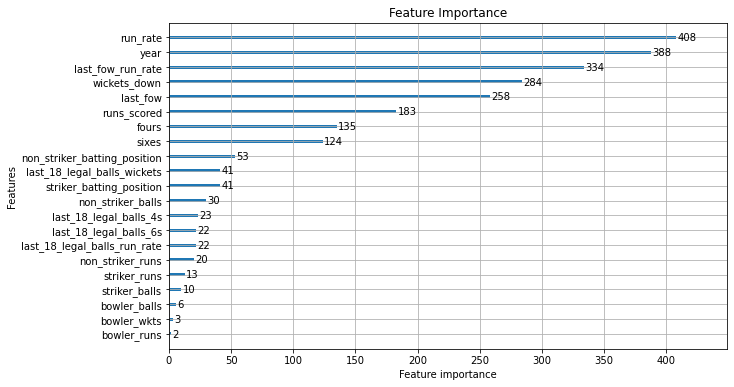

In [53]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'final_model' as the trained LightGBM model

# Create a feature importance plot
lgb.plotting.plot_importance(final_model,  figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [54]:
X_test.last_fow_run_rate.describe()

count    3144.000000
mean        6.730307
std         3.345799
min        -1.000000
25%         5.016393
50%         7.000000
75%         8.705882
max        14.636364
Name: last_fow_run_rate, dtype: float64

### prediction using LGB classifier

In [ ]:
# score :: 2023, 5, 7, 5, 231,222, 6.2432, 223, 8,  4, 42, 6.3412, 24, 5, 5.2, 1, 0,0

In [ ]:
#year_encoder = LabelEncoder().fit(X_train_categorical['year'])
print(year_encoder.transform([2023]))
print(wickets_down_encoder.transform([5]))
print(striker_batting_position_encoder.transform([7]))
print(non_striker_batting_position_encoder.transform([5]))


#'wickets_down', 'striker_batting_position',
#       'non_striker_batting_position', 'runs_scored', 'legal_balls_bowled',
#       'run_rate', 'last_fow', 'partnership_runs', 'striker_runs',
#       'non_striker_runs', 'last_fow_run_rate', 'last_30_legal_balls_run_rate',
#'last_30_legal_balls_wickets'



In [ ]:
to_be_predicted = np.array([21, 5, 6, 4, 231,222, 6.2432, 223, 8,  4, 42, 6.3412, 24, 5, 5.2, 1, 0,0]).reshape(1,-1)

Y_encoder.inverse_transform(lgbm_classifier.predict(to_be_predicted))

print(lgbm_classifier.predict_proba(to_be_predicted))

### training an CATBoost model on Y_train_numerical

In [38]:
X_train.columns

Index(['year', 'wickets_down', 'striker_batting_position',
       'non_striker_batting_position', 'bowler_wkts', 'runs_scored',
       'run_rate', 'last_fow', 'striker_runs', 'striker_balls',
       'non_striker_runs', 'non_striker_balls', 'bowler_balls', 'bowler_runs',
       'last_fow_run_rate', 'fours', 'sixes', 'last_18_legal_balls_run_rate',
       'last_18_legal_balls_wickets', 'last_18_legal_balls_4s',
       'last_18_legal_balls_6s'],
      dtype='object')

pip install catboost

In [40]:
from catboost import CatBoostRegressor

ModuleNotFoundError: No module named 'catboost'

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a CatBoost Regressor
catboost_regressor = CatBoostRegressor(iterations=500, depth=6, 
                                       #learning_rate=0.1, 
                                       loss_function='RMSE')

# Train the model
catboost_regressor.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

# Make predictions on the test set
y_pred = catboost_regressor.predict(X_test)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse}")


In [215]:
import lightgbm as lgb

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=Y_train_numerical)

# Define hyperparameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'mae',           # MAE as the evaluation metric
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'num_leaves': 31,           # Maximum number of leaves in one tree
    'learning_rate': 0.05,     # Learning rate (you can tune this)
    'feature_fraction': 0.9,   # Fraction of features to use in each iteration
    'bagging_fraction': 0.2,   # Fraction of data to use in each iteration
    'bagging_freq': 5,         # Frequency for bagging
    'verbose': -1               # No output during training
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds (you can tune this)
bst = lgb.train(params, train_data, num_round)

# Now, you have a trained LightGBM regression model in 'bst'


### training an LGBM model on Y_train_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the target labels and transform them
Y_encoder = label_encoder.fit(Y_train_categorical)

Y_train_categorical_encoded = Y_encoder.transform(Y_train_categorical)


In [ ]:
import lightgbm as lgb

# Create an LGBM classification model with specified hyperparameters
lgbm_classifier = lgb.LGBMClassifier(
    boosting_type='gbdt',     # Gradient Boosting Decision Tree
    num_leaves=31,            # Maximum number of leaves in one tree
    max_depth=7,             # Maximum tree depth (-1 means no limit)
    learning_rate=0.05,        # Learning rate (step size during optimization)
    colsample_bytree= 0.5,   # Fraction of features to consider when building each tree
    #n_estimators=100,         # Number of boosting rounds (trees)
    subsample_for_bin=200,  # Number of samples for constructing bins
    objective='multiclass',   # Objective function for multiclass classification
    num_class=len(np.unique(Y_train_categorical_encoded)),  # Number of classes
    random_state=42           # Random seed for reproducibility
)

n_estimators=100,  # Number of boosting rounds (trees)

# Train the LGBM classification model on the training data
lgbm_classifier.fit(X_train, Y_train_categorical_encoded)


#### notes ::
1. subsample_for_bin decrease <-> less overfitting
2. max_depth decrease <-> worse fit, but no overfitting either
3. learning_rate increse <-> overfitting increases

### visualizing performances by LGBM classifier

In [ ]:
Y_test_categorical_encoded = Y_encoder.transform(Y_test_categorical)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have 'lgbm_classifier' as the trained LightGBM classifier

# Predict on the test set
y_pred_encoded = lgbm_classifier.predict(X_test)

# Decode the integer-encoded predictions back to original class labels
#y_pred = Y_encoder.inverse_transform(y_pred_encoded)

# Create a classification report
classification_rep = classification_report(Y_test_categorical_encoded, y_pred_encoded)

# Create a confusion matrix
confusion = confusion_matrix(Y_test_categorical_encoded, y_pred_encoded)

# Print the results

print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion)


In [ ]:
print(classification_report(Y_train_categorical_encoded, lgbm_classifier.predict(X_train)))


### Feature importance

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming you have 'lgbm_classifier' as the trained LightGBM classifier

# Create a feature importance plot
lgb.plot_importance(lgbm_classifier, figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [ ]:
X_test.columns

### prediction using LGBM

In [ ]:
# score :: 2023, 5, 7, 5, 231,222, 6.2432, 223, 8,  4, 42, 6.3412, 24, 5, 5.2, 1, 0,0

In [ ]:
#year_encoder = LabelEncoder().fit(X_train_categorical['year'])
print(year_encoder.transform([2023]))
print(wickets_down_encoder.transform([5]))
print(striker_batting_position_encoder.transform([7]))
print(non_striker_batting_position_encoder.transform([5]))


#'wickets_down', 'striker_batting_position',
#       'non_striker_batting_position', 'runs_scored', 'legal_balls_bowled',
#       'run_rate', 'last_fow', 'partnership_runs', 'striker_runs',
#       'non_striker_runs', 'last_fow_run_rate', 'last_30_legal_balls_run_rate',
#'last_30_legal_balls_wickets'



In [ ]:
to_be_predicted = np.array([21, 5, 6, 4, 231,222, 6.2432, 223, 8,  4, 42, 6.3412, 24, 5, 5.2, 1, 0,0]).reshape(1,-1)

bst.predict(to_be_predicted)



## saving the models and encoders

In [55]:
import joblib

# Save the regression model 'bst' to a file
joblib.dump(final_model, 'IPL_regression_model.pkl')

# Save the classification model 'lgbm_classifier' to a file
#joblib.dump(lgbm_classifier, 'IPL_classification_model.pkl')


['IPL_regression_model.pkl']

# ------------------------------------------------------------------------------------------
# EXPERIMENTATION
# ------------------------------------------------------------------------------------------

## adding the predicted column by previous LGBM model, and training a new model

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train_mod = X_train.copy()
X_test_mod = X_test.copy()

In [ ]:
X_train_mod['LGB_1_pred'] = bst.predict(X_train)
X_test_mod['LGB_1_pred'] = bst.predict(X_test)

In [ ]:
X_train_mod.shape

### training a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model with specified hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the trees (None means no maximum)
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    max_features='auto',  # Number of features to consider when splitting
    random_state=42      # Random seed for reproducibility
)

# Train the Random Forest model on the training data
rf_model.fit(X_train_mod, Y_train_numerical)


#### notes ::
1. learning_rate increase <-> overfitting increase
2. mse to mae <-> not much difference
3. feature_fraction <-> not much difference
4. bagging_fraction <-> not much difference
5. num_round increase <-> overfitting increase
6. bagging_freq <-> not much difference

### visualizing performances by RF

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have 'rf_model' as the trained Random Forest model
# Make predictions on the test set
y_pred = rf_model.predict(X_test_mod)

# Calculate performance metrics for the test set
test_rmse = np.sqrt(mean_squared_error(Y_test_numerical, y_pred))
test_mae = mean_absolute_error(Y_test_numerical, y_pred)
test_r2 = r2_score(Y_test_numerical, y_pred)

# Calculate performance metrics for the training set
train_pred = rf_model.predict(X_train_mod)
train_rmse = np.sqrt(mean_squared_error(Y_train_numerical, train_pred))
train_mae = mean_absolute_error(Y_train_numerical, train_pred)
train_r2 = r2_score(Y_train_numerical, train_pred)

# Create a comparison table
comparison = {
    'Metric': ['RMSE', 'MAE', 'R2'],
    'Training Set': [train_rmse, train_mae, train_r2],
    'Test Set': [test_rmse, test_mae, test_r2]
}

# Print the comparison table
print("Performance Metrics Comparison:")
print("-----------------------------")
print("{:<10} {:<15} {:<15}".format('Metric', 'Training Set', 'Test Set'))
for i in range(len(comparison['Metric'])):
    print("{:<10} {:<15.4f} {:<15.4f}".format(comparison['Metric'][i], comparison['Training Set'][i], comparison['Test Set'][i]))


## clearly, stacking and other ideas are overfitting

### stacking model

In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

# Assuming you have your features in X_train and labels in Y_train_numerical
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train_numerical, test_size=0.2, random_state=42)

# Define base models
models = [
 #   ('linear', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=15, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=15, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=15, random_state=42))
]

# Initialize the stacking model
stacked_model = StackingRegressor(estimators=models, final_estimator=LinearRegression())

# Fit the stacked model
stacked_model.fit(X_train, Y_train)

# Make predictions using the stacked model
stacked_predictions = stacked_model.predict(X_val)

# Calculate metrics
rmse_stacked = np.sqrt(mean_squared_error(Y_val, stacked_predictions))
mae_stacked = mean_absolute_error(Y_val, stacked_predictions)
r2_stacked = r2_score(Y_val, stacked_predictions)

# Calculate Adjusted R-squared
n = len(Y_val)
p = X_val.shape[1]
adjusted_r2_stacked = 1 - (1 - r2_stacked) * ((n - 1) / (n - p - 1))

print(f'Stacked Model RMSE: {rmse_stacked}')
print(f'Stacked Model MAE: {mae_stacked}')
print(f'Stacked Model R2: {r2_stacked}')
print(f'Stacked Model Adjusted R2: {adjusted_r2_stacked}')


ValueError: Found input variables with inconsistent numbers of samples: [85926, 107408]

In [37]:
# Make predictions on the train set
train_predictions = stacked_model.predict(X_train)

# Calculate performance metrics for train set
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predictions))
train_mae = mean_absolute_error(Y_train, train_predictions)
train_r2 = r2_score(Y_train, train_predictions)



# Make predictions on the test set
test_predictions = stacked_model.predict(X_test)

# Calculate performance metrics for test set
test_rmse = np.sqrt(mean_squared_error(Y_test_numerical, test_predictions))
test_mae = mean_absolute_error(Y_test_numerical, test_predictions)
test_r2 = r2_score(Y_test_numerical, test_predictions)

# Create a comparison table
comparison = {
    'Metric': ['RMSE', 'MAE', 'R2'],
    'Training Set': [train_rmse, train_mae, train_r2],
    'Test Set': [test_rmse, test_mae, test_r2]
}

# Print the comparison table
print("Performance Metrics Comparison:")
print("-----------------------------")
print("{:<10} {:<15} {:<15}".format('Metric', 'Training Set', 'Test Set'))
for i in range(len(comparison['Metric'])):
    print("{:<10} {:<15.4f} {:<15.4f}".format(comparison['Metric'][i], comparison['Training Set'][i], comparison['Test Set'][i]))

Performance Metrics Comparison:
-----------------------------
Metric     Training Set    Test Set       
RMSE       3.4757          24.5253        
MAE        2.5075          17.9849        
R2         0.9873          0.6476         


In [38]:
# Calculate Adjusted R-squared for train
n = len(Y_train)
p = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * ((n - 1) / (n - p - 1))

# Calculate Adjusted R-squared for test
n = len(Y_test_numerical)
p = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * ((n - 1) / (n - p - 1))


#adjusted_r2_train = 1 - (1 - train_r2) * ((n - 1) / (n - p - 1))
print(train_adjusted_r2, test_adjusted_r2)

0.9872556293949574 0.6451837153900539


### hyperparameter tuning ::  randomizedsearchcv

#import xgboost as xgb
import time
from sklearn.model_selection import RandomizedSearchCV
#import numpy as np

####### Define the parameter grid for hyperparameter tuning
param_grid = {
    'objective': ['reg:squaredlogerror','reg:squarederror'], # objectives listed
    'n_estimators': np.arange(300, 1000, 100),  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
    'max_depth': np.arange(3, 10),  # Maximum depth of each tree
    'min_child_weight': np.arange(1, 6),  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for training each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.3]  # L2 regularization term on weights
}

######## Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()


t1 = time.time()
######## Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=2, \
                                   scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=42, n_jobs=-1)

######## Fit the Randomized Search to your training data
random_search.fit(X_train, Y_train_numerical)

t2 = time.time()
######## Print the best hyperparameters and corresponding MSE score
print("Best Hyperparameters:")
print(random_search.best_params_)
print("Best MSE Score:", -random_search.best_score_)
print('seconds taken to search and fit: ', t2-t1)

### visualizing the results

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already fitted the model to the training data (X_train, Y_train_numerical)
# model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
# model.fit(X_train, Y_train_numerical)

# Predict on the training set
Y_train_numerical_pred = model.predict(X_train)

# Predict on the test set
Y_test_numerical_pred = model.predict(X_test)

# Calculate and print important performance metrics for training set
print("Training Set Metrics:")
print("Root Mean Squared Error (MSE):", mean_squared_error(Y_train_numerical, Y_train_numerical_pred, squared=True))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_train_numerical, Y_train_numerical_pred))
print("R-squared (R²):", r2_score(Y_train_numerical, Y_train_numerical_pred))

# Calculate and print important performance metrics for test set
print("\nTest Set Metrics:")
print("Root Mean Squared Error (MSE):", mean_squared_error(Y_test_numerical, Y_test_numerical_pred, squared=True))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test_numerical, Y_test_numerical_pred))
print("R-squared (R²):", r2_score(Y_test_numerical, Y_test_numerical_pred))


In [ ]:
#import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already fitted the model to the training data (X_train, y_train)
# model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
# model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importance = model.feature_importances_

# Get the feature names from X_train
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


#### observation::

following variables have negligible importance --
'year', 'last_30_legal_balls_4s', 'fours', 'sixes', 'last_30_legal_balls_6s'

### dropping some low-importance variables and retraining

In [ ]:
cols_to_drop = ['year', 'last_30_legal_balls_4s', 'fours', 'sixes', 'last_30_legal_balls_6s']
X_train_1 = X_train.drop(labels = cols_to_drop, axis=1)
X_test_1 = X_test.drop(labels = cols_to_drop, axis=1)

In [ ]:
X_test.fillna(0, inplace=True)

In [ ]:
import xgboost as xgb

# Define hyperparameters
params = {
    'objective': 'reg:squaredlogerror',  # Regression task
    'n_estimators': 500,             # Number of boosting rounds (trees)
    'learning_rate': 0.1,           # Step size shrinkage to prevent overfitting
    'max_depth': 7,                 # Maximum depth of each tree
    'subsample': 0.8,               # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,        # Fraction of features used for training each tree
    'gamma': 0,                     # Minimum loss reduction required to make a further partition on a leaf node
    'lambda': 1,                    # L2 regularization term on weights
    'alpha': 0,                     # L1 regularization term on weights
    'eval_metric': 'mae'           # Evaluation metric (Root Mean Squared Error)
}

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(**params)

# Train the model on the training data
model.fit(X_train_1, Y_train_numerical)

# You can now use the trained model for predictions


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already fitted the model to the training data (X_train, Y_train_numerical)
# model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
# model.fit(X_train, Y_train_numerical)

# Predict on the training set
Y_train_numerical_pred = model.predict(X_train_1)

# Predict on the test set
Y_test_numerical_pred = model.predict(X_test_1)

# Calculate and print important performance metrics for training set
print("Training Set Metrics:")
print("Root Mean Squared Error (MSE):", mean_squared_error(Y_train_numerical, Y_train_numerical_pred, squared=False))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_train_numerical, Y_train_numerical_pred))
print("R-squared (R²):", r2_score(Y_train_numerical, Y_train_numerical_pred))

# Calculate and print important performance metrics for test set
print("\nTest Set Metrics:")
print("Root Mean Squared Error (MSE):", mean_squared_error(Y_test_numerical, Y_test_numerical_pred, squared=False))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test_numerical, Y_test_numerical_pred))
print("R-squared (R²):", r2_score(Y_test_numerical, Y_test_numerical_pred))


In [ ]:
#import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already fitted the model to the training data (X_train, y_train)
# model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
# model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importance = model.feature_importances_

# Get the feature names from X_train
feature_names = X_train_1.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()



In [ ]:
np.array([1,2,3,3,2,1,1,2,3,3,2,1,7])

In [ ]:
X_train_1.columns

In [ ]:
#year_encoder = LabelEncoder().fit(X_train_categorical['year'])
print(wickets_down_encoder.transform([6]))
print(striker_batting_position_encoder.transform([6]))
print(non_striker_batting_position_encoder.transform([8]))


In [ ]:
#'wickets_down', 'striker_batting_position',
#       'non_striker_batting_position', 'runs_scored', 'legal_balls_bowled',
#       'run_rate', 'last_fow', 'partnership_runs', 'striker_runs',
#       'non_striker_runs', 'last_fow_run_rate', 'last_30_legal_balls_run_rate',
#'last_30_legal_balls_wickets'

to_be_predicted = np.array([6,5,7,162,210,6*162/210, 161, 162-161, 40, 1, 4.7122, 25, 2]).reshape(1,-1)

model.predict(to_be_predicted)

In [ ]:
year_encoder.transform([2023])

###

In [ ]:
X_train.columns

In [ ]:
X_train.iloc[1].values

In [ ]:
model.predict((X_train.iloc[1].values))

### LSTM model

In [ ]:
import keras
import tensorflow

In [ ]:
encoded_df.shape

In [ ]:

# Create a sample target variable
target = [1, 0, 1, 0, 1]

# Train an XGBoost model with the encoded features
xgb_model = xgb.XGBClassifier()
xgb_model.fit(encoded_df, target)
